# Desafío entregable: Data Storytelling

### A lo largo de las entregas hemos ido observando diversos aspectos de nuestro objeto de estudio, tanto desde el dataset elegido como a través de algunas APIs.

### A su vez, luego del EDA, hemos podido hacer foco no sólo en nuestro país sino además en algunos de los datos más significativos. Es así que profundizamos sobre aquellas causas de muerte que mayor evolución han tenido a lo largo del tiempo y las que más víctimas han tenido.

### Repasemos algunos de los resultados:

### 1. ¿Cuál es la causa de muerte con mayor número de víctimas en Argentina?

In [55]:
# Se importan las librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pytrends
from pytrends.request import TrendReq

In [56]:
df_arg_sum = pd.read_csv('https://raw.githubusercontent.com/santiago-giordano/datascienceproject/main/datasets/df_arg_sum.csv', index_col=[0])
df_arg_sum = df_arg_sum.head()
df_arg_sum_style = df_arg_sum.style.set_caption("Top 5: Cantidad de víctimas en Argentina").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '18px')
    ]
}])
df_arg_sum_style

,cause_of_death,total_sum
11,Cardiovascular Diseases,2836128
19,Neoplasms,2113666
12,Lower Respiratory Infections,697414
26,Chronic Respiratory Diseases,463952
28,Digestive Diseases,422716


In [57]:
kpi1 = df_arg_sum["total_sum"].max()
print("Las enfermedades carviovasculares son las que han tenido más víctimas con un total de: " + str(int(kpi1)) + " fallecidos.")

Las enfermedades carviovasculares son las que han tenido más víctimas con un total de: 2836128 fallecidos.


### 2. La enfermedad cardiovascular ha sido la que más víctimas se ha cobrado en Argentina. Sin embargo, ¿cómo se ha comportado desde un punto de vista diacrónico, es decir, a lo largo del tiempo?

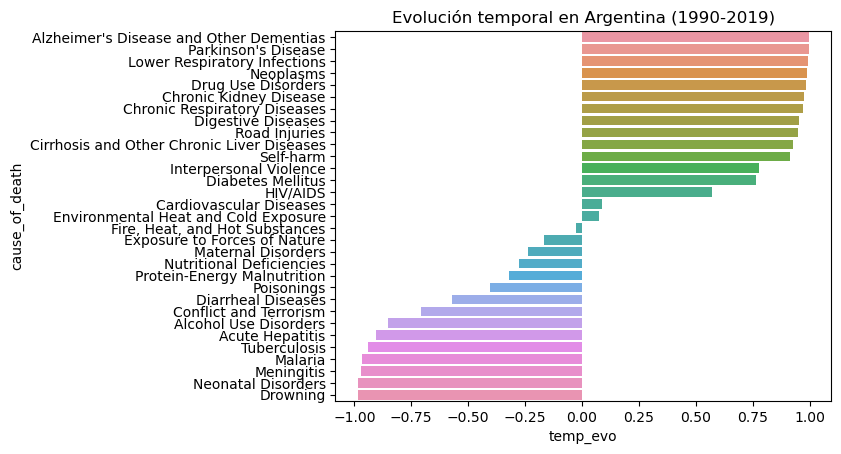

In [58]:
df_arg_tempevo = pd.read_csv('https://raw.githubusercontent.com/santiago-giordano/datascienceproject/main/datasets/df_arg_tempevo.csv', index_col=[0])
sns.barplot(data=df_arg_tempevo, x="temp_evo", y="cause_of_death")
plt.title('Evolución temporal en Argentina (1990-2019)')
plt.show()

### Como se observa en este gráfico, paradójicamente la enfermedad cardiovascular es una de las que menos ha evolucionado a lo largo del tiempo, es decir que a lo largo de los últimos 30 años no ha ni aumentado ni decrecido de forma significativa la cantidad de muertes por esta causa.

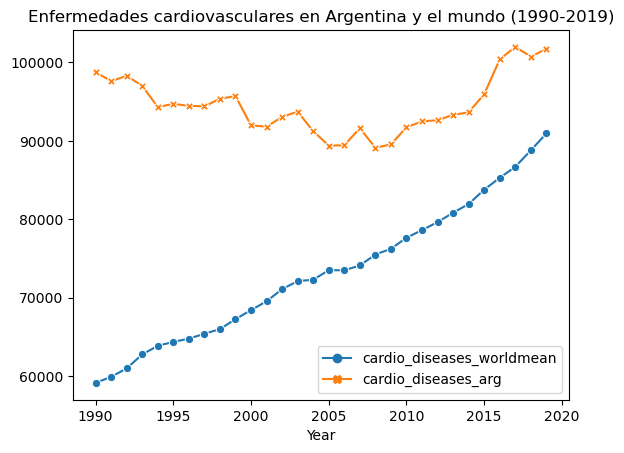

In [59]:
df_cv = pd.read_csv('https://raw.githubusercontent.com/santiago-giordano/datascienceproject/main/datasets/df_cv.csv', index_col=[0])
sns.lineplot(data=df_cv, markers=True, dashes=False)
plt.title('Enfermedades cardiovasculares en Argentina y el mundo (1990-2019)')
plt.show()

### Comparándolo con su comportamiento a nivel mundial, podemos observar que la divergencia es significativa. Mientras que en Argentina la evolución es relativamente "estable", a nivel mundial el aumento es lineal e ininterrumpido.

### 3. Por otro lado, si repasamos la información mas bien psico-social que nos entrega la API de Google, ¿con cuál de los dos comportamientos que hemos descripto se observará mayor correlación? ¿Estará la "conciencia social" al tanto de la gravedad de esta enfermedad?

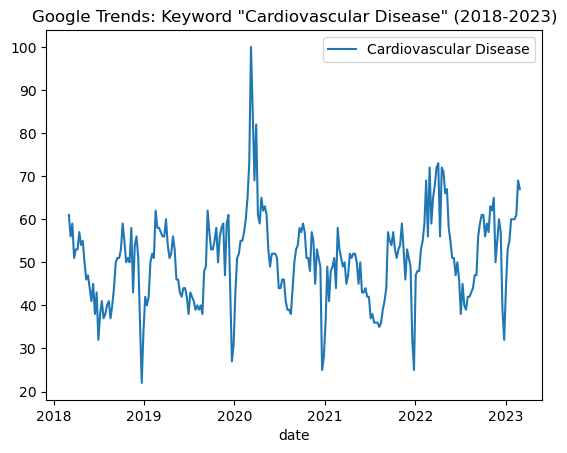

In [60]:
# Google Trends API
pytrend = TrendReq()
keyword = 'Cardiovascular Disease'
pytrend.build_payload(kw_list=[keyword])
trend_data = pytrend.interest_over_time()
trend_cardio_df = pd.DataFrame(trend_data)
trend_cardio_df.drop(columns=["isPartial"], inplace=True)
sns.lineplot(data=trend_cardio_df, markers=False, dashes=False)
plt.title('Google Trends: Keyword "Cardiovascular Disease" (2018-2023)')
plt.show()

### Al menos en este recorte temporal que nos ofrece la API, tentativamente podríamos interpretar que la "conciencia social" mundial no coincide con la tendencia significativamente "alcista" que observamos en la cantidad de muertes por enfermedad cardiovascular. Por otro lado, sí coincidiría con la tendencia relativamente "estable" que se observa en Argentina.

### En caso que esta interpretación fuera aunque sea aproximadamente correcta, la situación sería causa de alarma, en tanto a menos conciencia mayor posibilidad de potenciar la tendencia "alcista" observada.

### En conclusión, tanto por el estado de la "conciencia social" como por el hecho concreto de la cantidad de víctimas que estas enfermedades se cobran, resulta de suma importancia pensar estrategias para combatir este problema de Salud Pública.